# Análise de Risco de Crédito
## Cartão de Crédito

Baseado no curso _Outspoken Market na Prática_ (Leandro Guerra)

Dataset:
- UCI: http://archive.ics.uci.edu/ml/datasets/credit+approval
- Base anonimizada

### Objetivo:
- Entendimento do problema de análise de crédito
- Análise exploratória de dados (EAD)
- Tratar valores faltantes (missing values)
- Manipulação de variáveis categóricas
- Treinamento de **Regressão Logística**
- Avaliação do modelo

****

In [1]:
# Bibliotecas

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


****
#### Importar a base e visualizar os dados originais

In [2]:
# Carregando a base de dados e verificando-a.
base_cc = pd.read_csv("cc_approvals.data", header = None)

base_cc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
base_cc.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [4]:
base_cc.shape

(690, 16)

In [5]:
base_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


****
### Tratando valores faltantes e verificando colunas

In [6]:
# Verificando os valores faltantes
print(base_cc.isnull().values.any())
print(base_cc.isna().values.any())

False
False


Nota-se que não há valores nulos nem valores NaN

In [7]:
# Porém à preenchimentos incompativeis
base_cc.iloc[673].to_frame().transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.0,y,p,e,h,2.0,f,f,0,f,g,00256,17,-


In [8]:
# Substituindo preenchimentos com "?" e verificando se resolve
base_cc = base_cc.replace("?",np.NaN)

base_cc.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [9]:
# Verificando os valores faltantes
print(base_cc.isnull().values.any())
print(base_cc.isna().values.any())

True
True


Agora sim nota-se que há valores faltantes

In [10]:
# Preenchendo valores NaN com ffill
base_cc = base_cc.fillna(method = 'ffill')

print(base_cc.count())
base_cc.tail(20)

0     690
1     690
2     690
3     690
4     690
5     690
6     690
7     690
8     690
9     690
10    690
11    690
12    690
13    690
14    690
15    690
dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,a,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [11]:
# Na Europa e alguns localidades dos EUA, o código postal é composto por 5 dígitos.
# A variável numero 13 parece ser um código postal. 
# Como não será um modelo geoestatístico, vamos remover-lo.
base_cc = base_cc.drop(columns=13)

base_cc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+


In [12]:
# Renomear as colunas da base de dados
base_cc.columns = ["var1", "var2", "var3", "var4", "var5", "var6", "var7", "var8", 
                   "var9", "var10", "var11", "var12", "var13", "var14", "alvo"]

base_cc.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+


****
### Convertendo valores categóricos em numéricos

Como será empregada a Regressão Logística, os valores devem ser numéricos.

In [13]:
# Usando o LabelEncoder
encoder = LabelEncoder()

# Percorrendo todas as colunas
for variaveis in base_cc.columns:
    # Se a variável for do tupo 'object', faz o encode
    if base_cc[variaveis].dtype == 'object':
        base_cc[variaveis] = encoder.fit_transform(base_cc[variaveis])


base_cc.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0


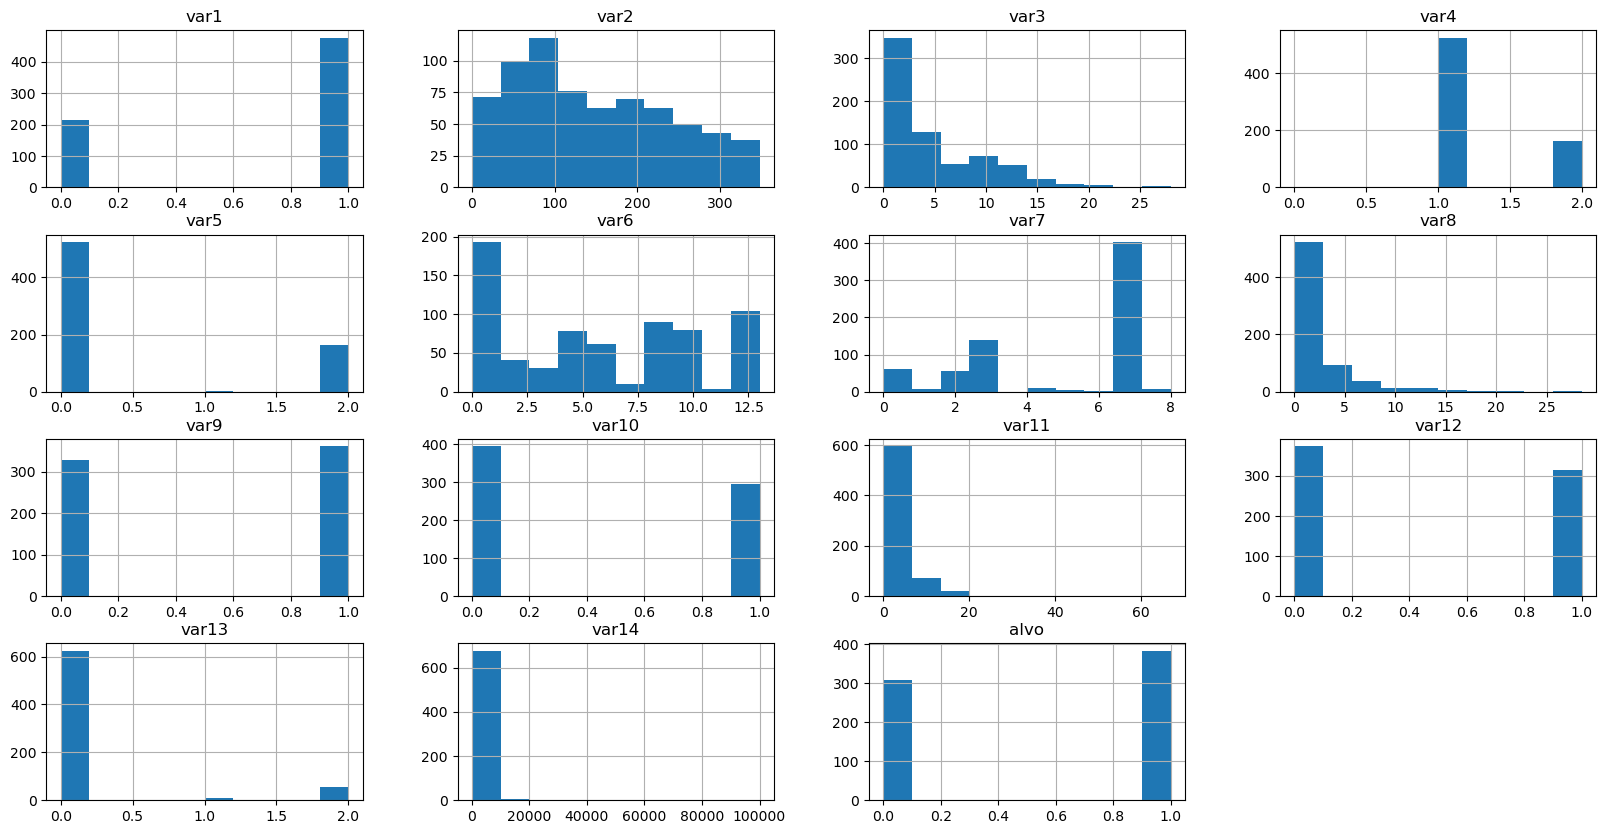

In [14]:
# Plotar os histogramas
base_cc.hist()
plt.gcf().set_size_inches(20, 10)

Nota-se algumas variáveis binárias (var9, var10, var12) e outras contínuas (demais variáveis).

Seleciona-se a var2 para uma análise de negócio:
- A relação entre variável e alvo deve ser preferencialmente linear, direta ou indireta.
- Se não houver relação linear, pode-se "traduzir" a variável contínua em variáveis numéricas por intervalo ou variáveis categoricas, com o objetivo de melhorar a compreensão do modelo diante dessa variável

Text(0.5, 1.0, 'Relação entre var2 e Alvo')

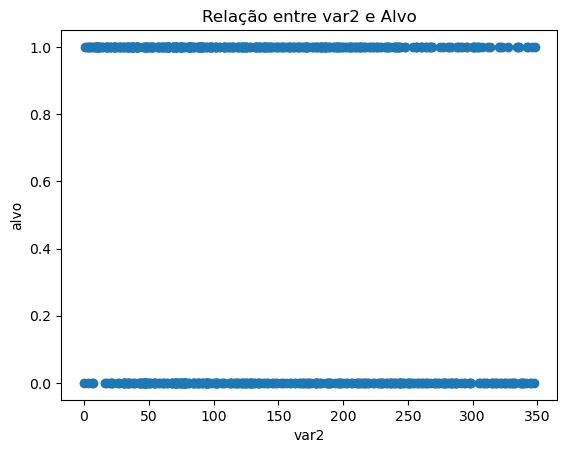

In [15]:
plt.scatter(base_cc['var2'], base_cc['alvo'])
plt.xlabel('var2')
plt.ylabel('alvo')
plt.title('Relação entre var2 e Alvo')

Vamos fatiar a variável e ver se os grupos criados de var2 seguem uma relação linear com o alvo

In [16]:
# Cria lista de intervalos da variavel var2, indo do valor minimo ao máximo+100, em intervalos de 50
var2_intervalos_lista = list(range(base_cc['var2'].min(), base_cc['var2'].max()+100, 50))

# Cria os nomes dos intervalos
nome_intervalos_lista = [ f'var2_i{i}' for i in range(len(var2_intervalos_lista)-1) ]

# Atribui ao dataframe a nova coluna 'var2_intervalos', composta de uma série criada pela função cut, que corta a variável var2, 
# como será cortada (var2_intervalos_lista) e os labels de cada corte (nome_intervalos_lista) se pertencer àquele intervalo
base_cc['var2_intervalos'] = pd.cut(base_cc['var2'], var2_intervalos_lista, labels = nome_intervalos_lista, include_lowest = True)

base_cc.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2_intervalos
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,var2_i3
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,var2_i6
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,var2_i1
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,var2_i2
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,var2_i0


In [17]:
# Analisando var2 com uma tabela cruzada para verificar o resultado dessa manipulação

# Metodo crosstab cria uma tabela cruzada as colunas 'alvo', e 'var2_intervalos'
cross_cc = pd.crosstab(index=base_cc["alvo"], columns=base_cc["var2_intervalos"])

# Altera o indice para melhor visualizar
cross_cc.index = ["Rejected", "Accepted"]

cross_cc

var2_intervalos,var2_i0,var2_i1,var2_i2,var2_i3,var2_i4,var2_i5,var2_i6
Rejected,44,65,45,39,42,40,32
Accepted,79,91,62,61,45,26,19


Nota-se que à medida que aumenta o valor de var2 (aqui fatiada em var_intervalos), a quantidade de aprovados reduzem.

In [18]:
# Garante que não foram gerados valores NaNs
base_cc = base_cc.fillna(method = 'ffill')

base_cc.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2_intervalos
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,var2_i3
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,var2_i6
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,var2_i1
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,var2_i2
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,var2_i0


In [19]:
# Como será adotada a nova variável var2_intervalos, remove-se var2
base_cc = base_cc.drop(columns="var2")

# E converte para variável numérica
categorias = {"var2_intervalos": {"var2_i0": 0, "var2_i1": 1, "var2_i2" : 2, "var2_i3" : 3, "var2_i4" : 4, "var2_i5" : 5, "var2_i6" : 6, "var2_i7" : 7}}
base_cc.replace(categorias, inplace = True)
base_cc['var2_intervalos'] = base_cc['var2_intervalos'].astype(int)

base_cc.head()

,var1,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2_intervalos
0,1,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,3
1,0,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,6
2,0,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,1
3,1,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,2
4,1,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,0


Para teste, será aplicado futuramente o mesmo procedimento para as variáveis var3 e var14.

In [20]:
print(base_cc["var3"].describe())
print()
print(base_cc["var14"].describe())

count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: var3, dtype: float64

count       690.000000
mean       1017.385507
std        5210.102598
min           0.000000
25%           0.000000
50%           5.000000
75%         395.500000
max      100000.000000
Name: var14, dtype: float64


****
### Separando a base entre treinamento e teste

In [21]:
# Separando os dados com as variaveis em x e o alvo em y
x = base_cc.drop(columns="alvo")
y = base_cc["alvo"]

# Separando entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

****
### Treinamento da Regressão Logística

A utilização da statsmodels permite visualizar um relatório mais completo.

In [31]:
# Inicializa a instancia e treina o modelo
x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

reg_log = sm.GLM(y_train, x_train_, family=sm.families.Binomial())

reg_log = reg_log.fit()

print(reg_log.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   alvo   No. Observations:                  345
Model:                            GLM   Df Residuals:                      330
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.17
Date:                Wed, 21 Jun 2023   Deviance:                       212.35
Time:                        16:12:31   Pearson chi2:                     305.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5314
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              26.4721   1.18e+04     

Observações:

- var2_intervalos:
    - coef=peso (beta) -> podem ser positivos ou negativos.
    - Deve-se verificar se o sinal está correto. Se o alvo é 0 ou 1, a probabilidade será do menor para o maior
    - Como visto, conforme aumenta var2_intervalos, a taxa de aprovados reduz
    - Então conforme maior for o valor de var2_intervalos, mais será penalizada a taxa de aprovados
    - Como o coef de var2_intervalos é -0.0567, nota-se a relação linear inversa.
- var4 e var5:
    - P>|z| -> p-valor:
    - As variáveis onde P>|z| são muito grandes não são estatisticamente significativas.
    - Além disso, var4 e var5 tem pesos (coef) muito grandes
    - Dentro do modelo, essas variáveis tem hegemonia muito maior que as outras variáveis, podendo impactar o resultado por si só.
    - Futuramente será testado o resultado considerando a remoção dessas variáveis.

In [36]:
print('Parâmetros:')
reg_log.params

Parâmetros:


const              26.472122
var1                0.087277
var3                0.026316
var4              -22.882468
var5               11.889394
var6               -0.060627
var7               -0.035180
var8               -0.155541
var9               -3.760514
var10              -0.665125
var11              -0.032807
var12               0.333861
var13               0.072433
var14              -0.000595
var2_intervalos    -0.056746
dtype: float64

In [38]:
print("Odds ratio:")
print(np.exp(reg_log.params))

Odds ratio:
const              3.138315e+11
var1               1.091199e+00
var3               1.026665e+00
var4               1.154172e-10
var5               1.457130e+05
var6               9.411745e-01
var7               9.654313e-01
var8               8.559519e-01
var9               2.327177e-02
var10              5.142094e-01
var11              9.677249e-01
var12              1.396349e+00
var13              1.075121e+00
var14              9.994053e-01
var2_intervalos    9.448344e-01
dtype: float64


Odds Ratio:

- A exponencial dos parâmetros me retorna o valor do peso para se aplicar a regressão logística.
- Sua análise melhora a interpretabilidade do resultado.
- Indica o quanto a variação de uma unidade na variável impacta na variação do modelo.
- Nota-se que var4 e var5 impactam muito o modelo. A remoção dessas variáveis pode ser problemática para o resultado do modelo.

****
### Avaliação do modelo

In [39]:
# Fazendo a previsão na base de treinamento e na de teste
y_pred_train = reg_log.predict(x_train_)
y_pred_test = reg_log.predict(x_test_)

In [49]:
# Treinamento
# Calculando a ROC e o Gini
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

print('Treinamento:')
print("AUC : ", round(roc_auc_train, 2))
print("Gini: ", round(2*roc_auc_train-1, 2))

Treinamento:
AUC :  0.94
Gini:  0.88


In [51]:
# Teste
# Calculando a ROC e o Gini
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

print('Teste:')
print("AUC : ", round(roc_auc_test, 3))
print("Gini: ", round(2*roc_auc_test-1, 2))

Teste:
AUC :  0.905
Gini:  0.81


#### Ponto de corte

Qual é o melhor ponto de corte para a aceitação do pedido de cartão de crédito?

-> O cruzamento entre True Positive Rate e False Positive Rate - onde TPR é mais alta e FPR é a mais baixa

In [62]:
i = np.arange(len(tpr_train))
roc_train = pd.DataFrame({'fpr'  : pd.Series(fpr_train, index=i),
                          'tpr'  : pd.Series(tpr_train, index = i), 
                          '1-fpr': pd.Series(1-fpr_train, index = i), 
                          'tf'   : pd.Series(tpr_train - (1-fpr_train), index = i), 
                          'thresholds': pd.Series(thresholds_train, index = i)})

df_ponto_corte_otimo = round(roc_train.loc[(roc_train.tf-0).abs().argsort()[:1]],3)
display(df_ponto_corte_otimo)

,fpr,tpr,1-fpr,tf,thresholds
33,0.124,0.875,0.876,-0.001,0.425


In [65]:
print("Ponto de corte ótimo - threshold: ", df_ponto_corte_otimo['thresholds'].reset_index(drop=True)[0])

Ponto de corte ótimo - threshold:  0.425


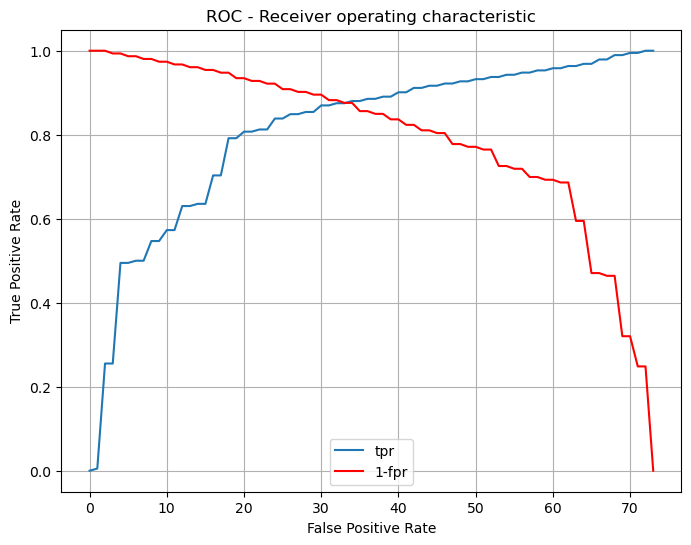

In [77]:
# Plotando a ROC (AUC) - Treinamento
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(roc_train['tpr'], label='tpr')
plt.plot(roc_train['1-fpr'], color = 'red', label='1-fpr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver operating characteristic')
plt.legend()
plt.grid()
plt.show()

De maneira simplista, em um pedaço da base, desejo pegar a menor quantidade de bons pagadores para identificar a maior quantidade de maus pagadores. O cruzamento das curvas indica esse ponto ótimo. 

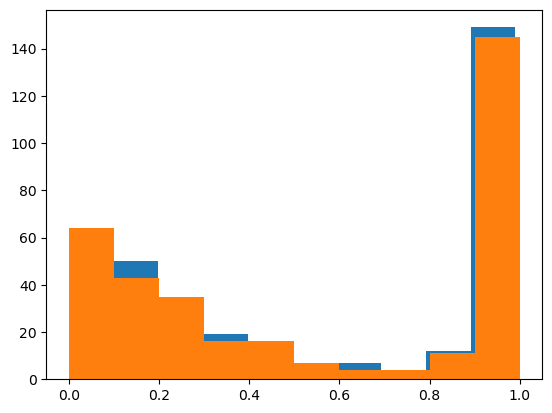

In [78]:
# Ajustando o ponto de corte
cutoff = 0.425

# Porém, nota-se que os scores finais não são tão granulares (base pequena/poucas variáveis)
# E há concentração no 1
plt.hist(y_pred_train)
plt.hist(y_pred_test)
plt.show()

# O efeito será limitado pelo exemplo, mas em bases maiores o impacto é enorme

In [88]:
# Pre-processamento para a matriz de confusão - Os dados devem ser binários

# Percorrendo e transformando toda as probabilidades do treinamento
y_pred_train_bin = np.where(y_pred_train >= cutoff, 1, 0)

# Percorrendo e transformando toda as probabilidades do teste
y_pred_test_bin = np.where(y_pred_test >= cutoff, 1, 0)

In [89]:
# Avaliando a base de treinamento
print("Avaliando a base de treinamento:")
print(confusion_matrix(y_train, y_pred_train_bin))
print()

# Avaliando a base de teste
print("Avaliando a base de test:")
print(confusion_matrix(y_test, y_pred_test_bin))

Avaliando a base de treinamento:
[[135  18]
 [ 24 168]]

Avaliando a base de test:
[[130  24]
 [ 29 162]]
